In [1]:
import pandas as pd

In [2]:
pd.options.display.width= None
pd.options.display.max_columns= None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [61]:
df = pd.read_excel('datasets/asels.xlsx')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,02-05-2012,0.57,0.56,0.57,0.56,2118111.0,235,1.7599,589,2482,1410,347.0,197.0
1,03-05-2012,0.59,0.56,0.60,0.59,17971078.0,235,1.7595,593,2587,1471,362.0,206.0
2,04-05-2012,0.58,0.58,0.59,0.59,5051939.0,235,1.7567,590,2552,1453,357.0,203.0
3,07-05-2012,0.58,0.57,0.59,0.58,3687418.0,235,1.7652,588,2540,1439,356.0,201.0
4,08-05-2012,0.59,0.58,0.60,0.59,11154762.0,235,1.7640,587,2599,1473,364.0,206.0


In [62]:
df.index = pd.to_datetime(df["Tarih"], format='%d-%m-%Y')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
Tarih,,,,,,,,,,,,,
2012-05-02,02-05-2012,0.57,0.56,0.57,0.56,2118111.0,235,1.7599,589,2482,1410,347.0,197.0
2012-05-03,03-05-2012,0.59,0.56,0.60,0.59,17971078.0,235,1.7595,593,2587,1471,362.0,206.0
2012-05-04,04-05-2012,0.58,0.58,0.59,0.59,5051939.0,235,1.7567,590,2552,1453,357.0,203.0
2012-05-07,07-05-2012,0.58,0.57,0.59,0.58,3687418.0,235,1.7652,588,2540,1439,356.0,201.0
2012-05-08,08-05-2012,0.59,0.58,0.60,0.59,11154762.0,235,1.7640,587,2599,1473,364.0,206.0


In [63]:
df_copy=df.copy()

In [64]:
start_date = '2015-01-01'
end_date = '2024-08-05'
filtered_df = df_copy[(df_copy.index >= start_date) & (df_copy.index <= end_date)]
filtered_df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
Tarih,,,,,,,,,,,,,
2015-01-02,02-01-2015,1.42,1.41,1.44,1.42,6402482.0,500,2.3491,855,6000,2554,840.0,358.0
2015-01-05,05-01-2015,1.44,1.42,1.45,1.43,18164375.0,500,2.3453,865,6050,2580,847.0,361.0
2015-01-06,06-01-2015,1.45,1.41,1.46,1.44,17234050.0,500,2.3319,869,6125,2627,858.0,368.0
2015-01-07,07-01-2015,1.45,1.43,1.48,1.46,16820038.0,500,2.3297,868,6125,2629,858.0,368.0
2015-01-08,08-01-2015,1.42,1.42,1.47,1.43,18931823.0,500,2.3118,877,6000,2595,840.0,363.0


In [65]:
df_new_drop = df_copy.drop(["Tarih", "Min(TL)","Max(TL)","AOF(TL)","Hacim(TL)","Sermaye(mn TL)","USDTRY","BIST 100","PiyasaDeğeri(mn TL)","PiyasaDeğeri(mn USD)","HalkaAçık PD(mn TL)","HalkaAçık PD(mn USD)"], axis='columns')
df_new_drop.head()

,Kapanış(TL)
Tarih,
2012-05-02,0.57
2012-05-03,0.59
2012-05-04,0.58
2012-05-07,0.58
2012-05-08,0.59


In [66]:
df_new_drop["Kapanış(TL)"]=df_new_drop["Kapanış(TL)"].astype(float)

In [67]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 15]
%matplotlib inline

Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 4000x1500 with 0 Axes>

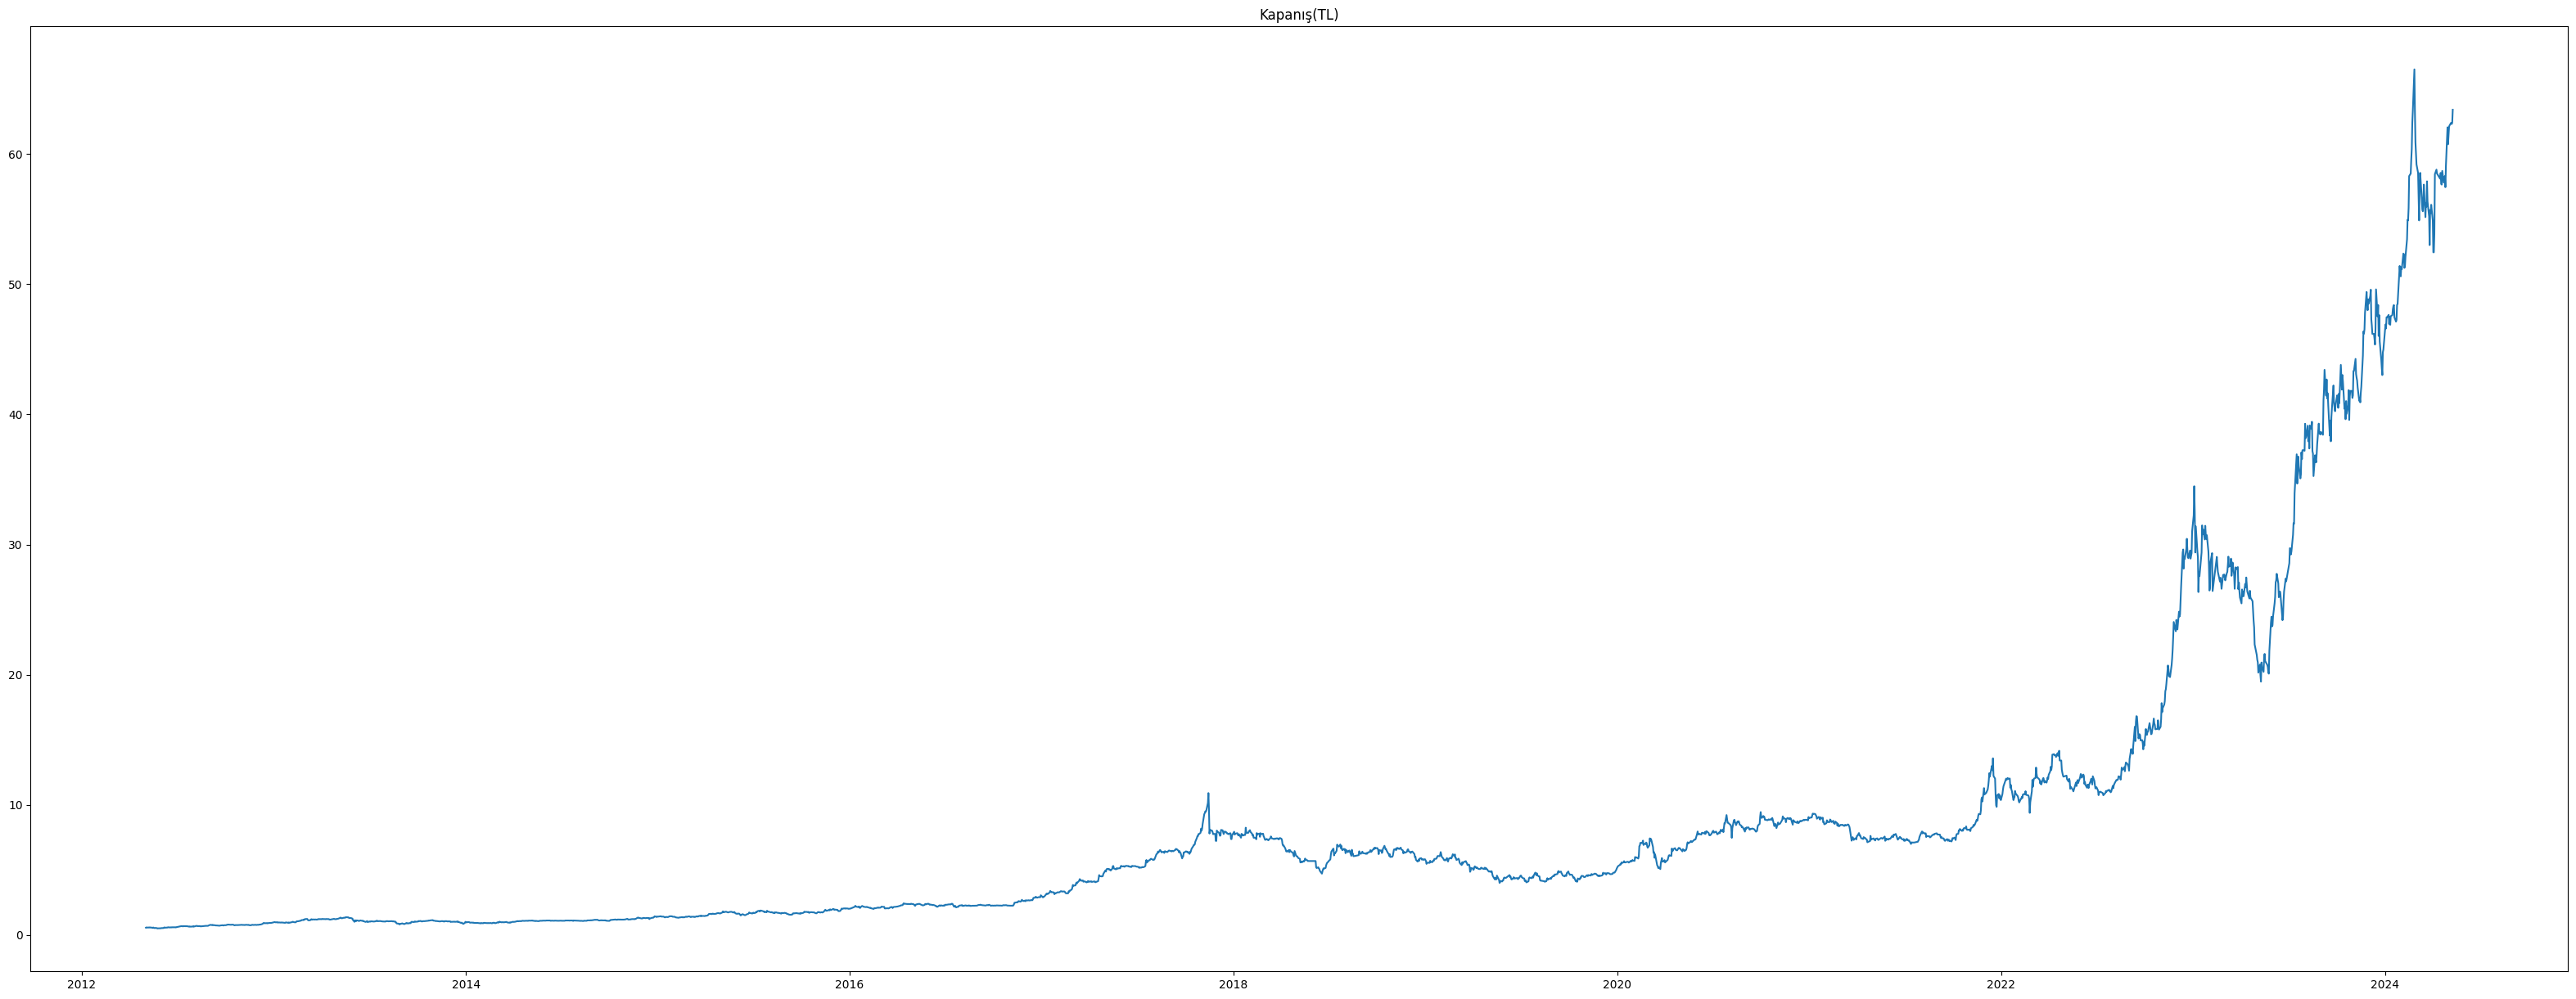

In [68]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(df_new_drop.index,df_new_drop["Kapanış(TL)"])
ax.set_title ('Kapanış(TL)')

In [69]:
len(df_new_drop)

3015

In [70]:
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(df_new_drop, autolag='AIC',regression='ct')

print(f"ADF Statistics:{adf_test[0]}")
print(f"P-value:{adf_test[1]}")
print(f"Number of Lags:{adf_test[2]}")
print(f"Number of Observations:{adf_test[3]}")
print(f"Critical Values:{adf_test[4]}")
print("Note:If P-value is smaller than 0.05, we reject the null Hypothesis")
print(f"P-value is smaller than 0.05:{0.05>adf_test[1]}")

ADF Statistics:3.3026329673466517
P-value:1.0
Number of Lags:27
Number of Observations:2987
Critical Values:{'1%': -3.96180402486693, '5%': -3.411960850416585, '10%': -3.127916058431808}
Note:If P-value is smaller than 0.05, we reject the null Hypothesis
P-value is smaller than 0.05:False


In [71]:
import numpy as np
transformed_df = pd.Series(np.log(df_new_drop["Kapanış(TL)"])).diff().dropna()
transformed_df.head()

Tarih
2012-05-03    0.034486
2012-05-04   -0.017094
2012-05-07    0.000000
2012-05-08    0.017094
2012-05-09   -0.017094
Name: Kapanış(TL), dtype: float64

Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 4000x1500 with 0 Axes>

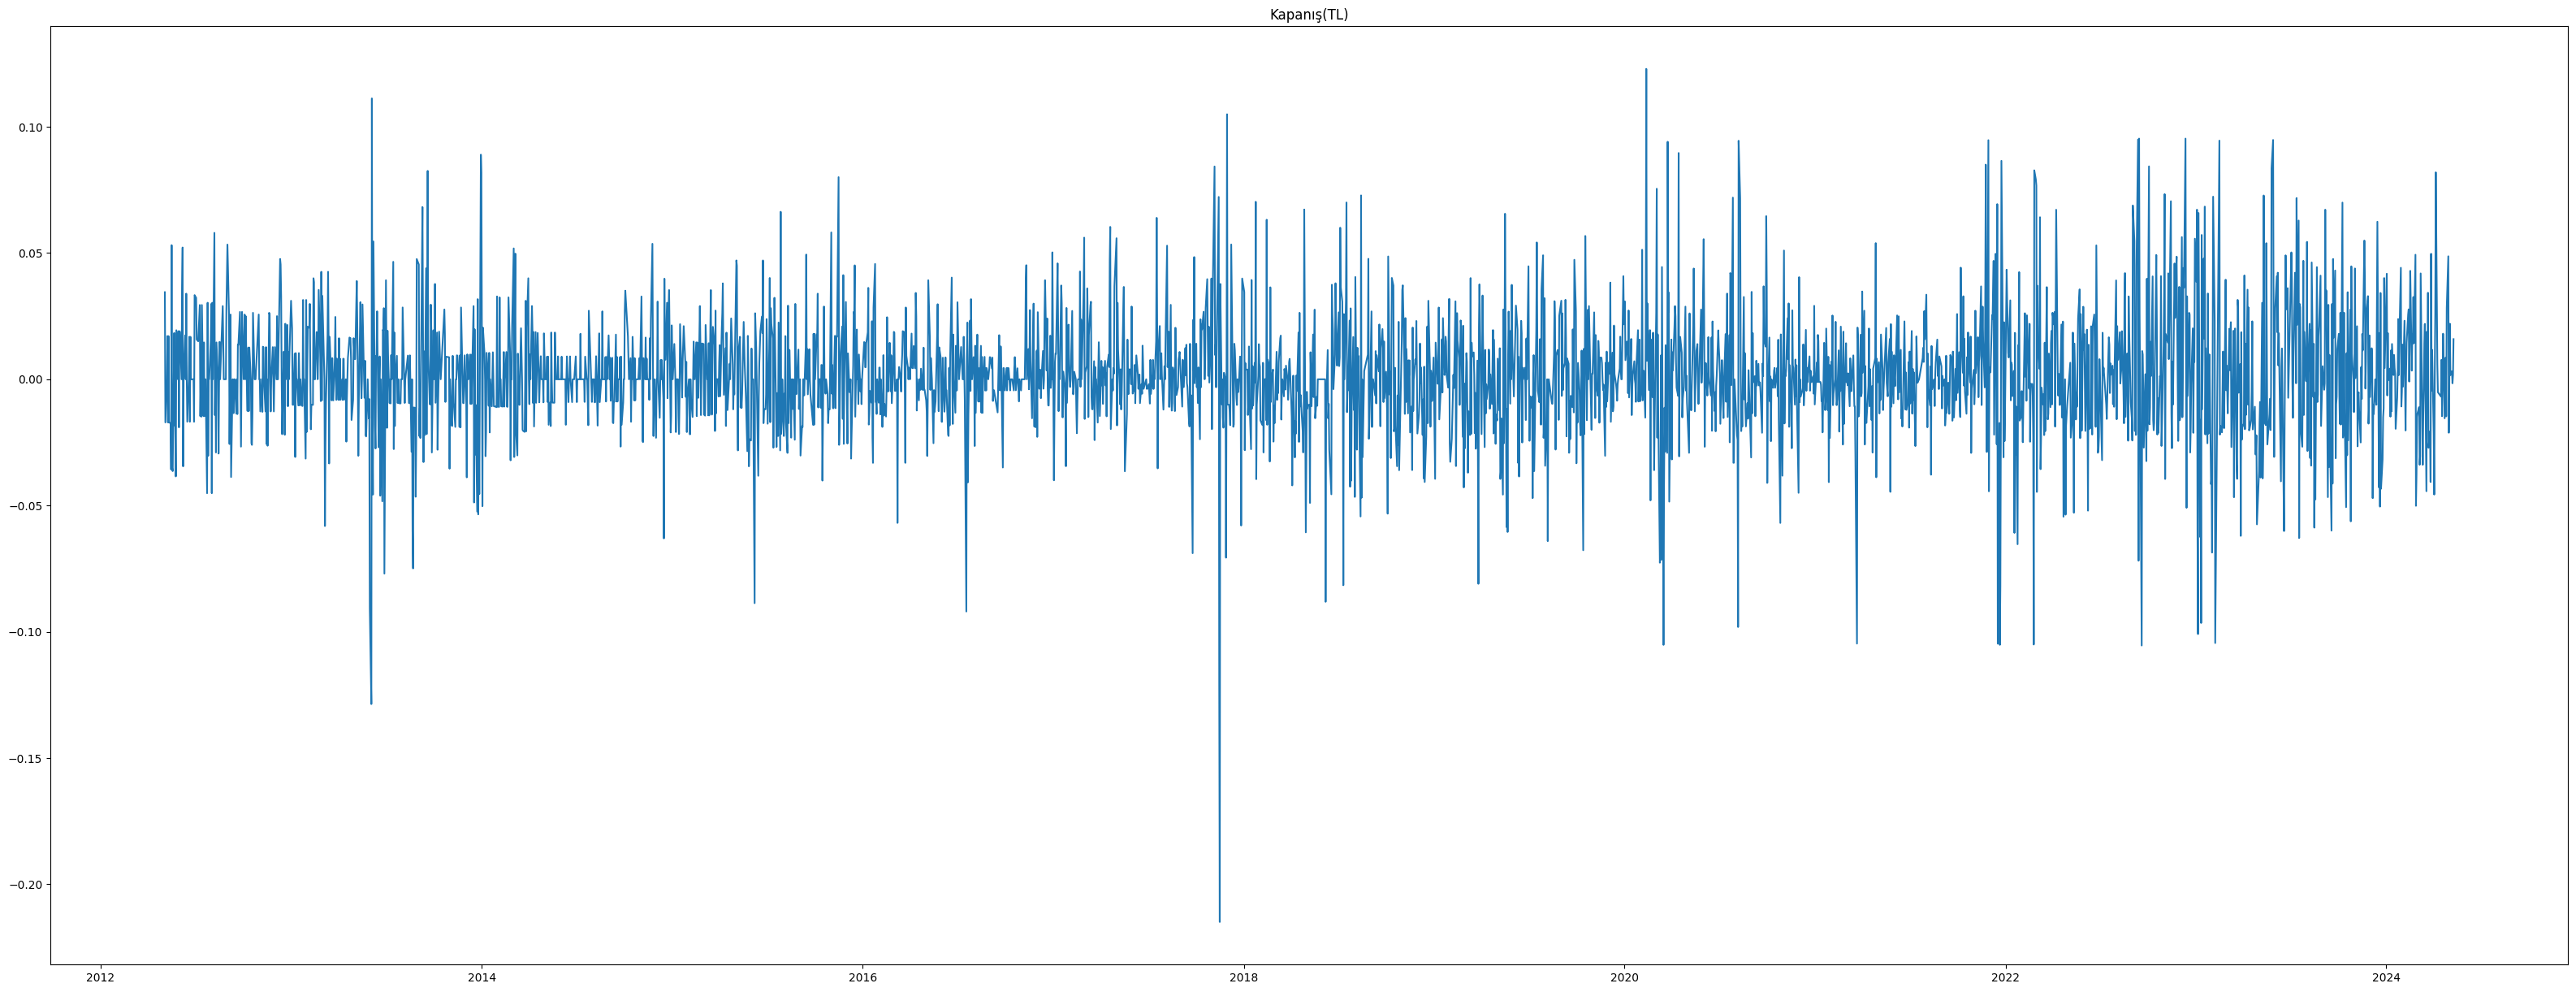

In [72]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(transformed_df)
ax.set_title ('Kapanış(TL)')

In [73]:
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(transformed_df, autolag='AIC',regression='ct')

print(f"ADF Statistics:{adf_test[0]}")
print(f"P-value:{adf_test[1]}")
print(f"Number of Lags:{adf_test[2]}")
print(f"Number of Observations:{adf_test[3]}")
print(f"Critical Values:{adf_test[4]}")
print("Note:If P-value is smaller than 0.05, we reject the null Hypothesis")
print(f"P-value is smaller than 0.05:{0.05>adf_test[1]}")

ADF Statistics:-23.1922122207186
P-value:0.0
Number of Lags:4
Number of Observations:3009
Critical Values:{'1%': -3.9617818187019287, '5%': -3.411950089066955, '10%': -3.127909723127912}
Note:If P-value is smaller than 0.05, we reject the null Hypothesis
P-value is smaller than 0.05:True


In [74]:
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(df_new_drop, autolag='AIC',regression='ct')

print(f"ADF Statistics:{adf_test[0]}")
print(f"P-value:{adf_test[1]}")
print(f"Number of Lags:{adf_test[2]}")
print(f"Number of Observations:{adf_test[3]}")
print(f"Critical Values:{adf_test[4]}")
print("Note:If P-value is smaller than 0.05, we reject the null Hypothesis")
print(f"P-value is smaller than 0.05:{0.05>adf_test[1]}")

ADF Statistics:3.3026329673466517
P-value:1.0
Number of Lags:27
Number of Observations:2987
Critical Values:{'1%': -3.96180402486693, '5%': -3.411960850416585, '10%': -3.127916058431808}
Note:If P-value is smaller than 0.05, we reject the null Hypothesis
P-value is smaller than 0.05:False


In [75]:
df_new_drop.isna().sum()

Kapanış(TL)    0
dtype: int64

In [76]:
df_new_drop=df_new_drop.interpolate(axis=0)
df_new_drop.isna().sum()

Kapanış(TL)    0
dtype: int64

Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 1500x600 with 0 Axes>

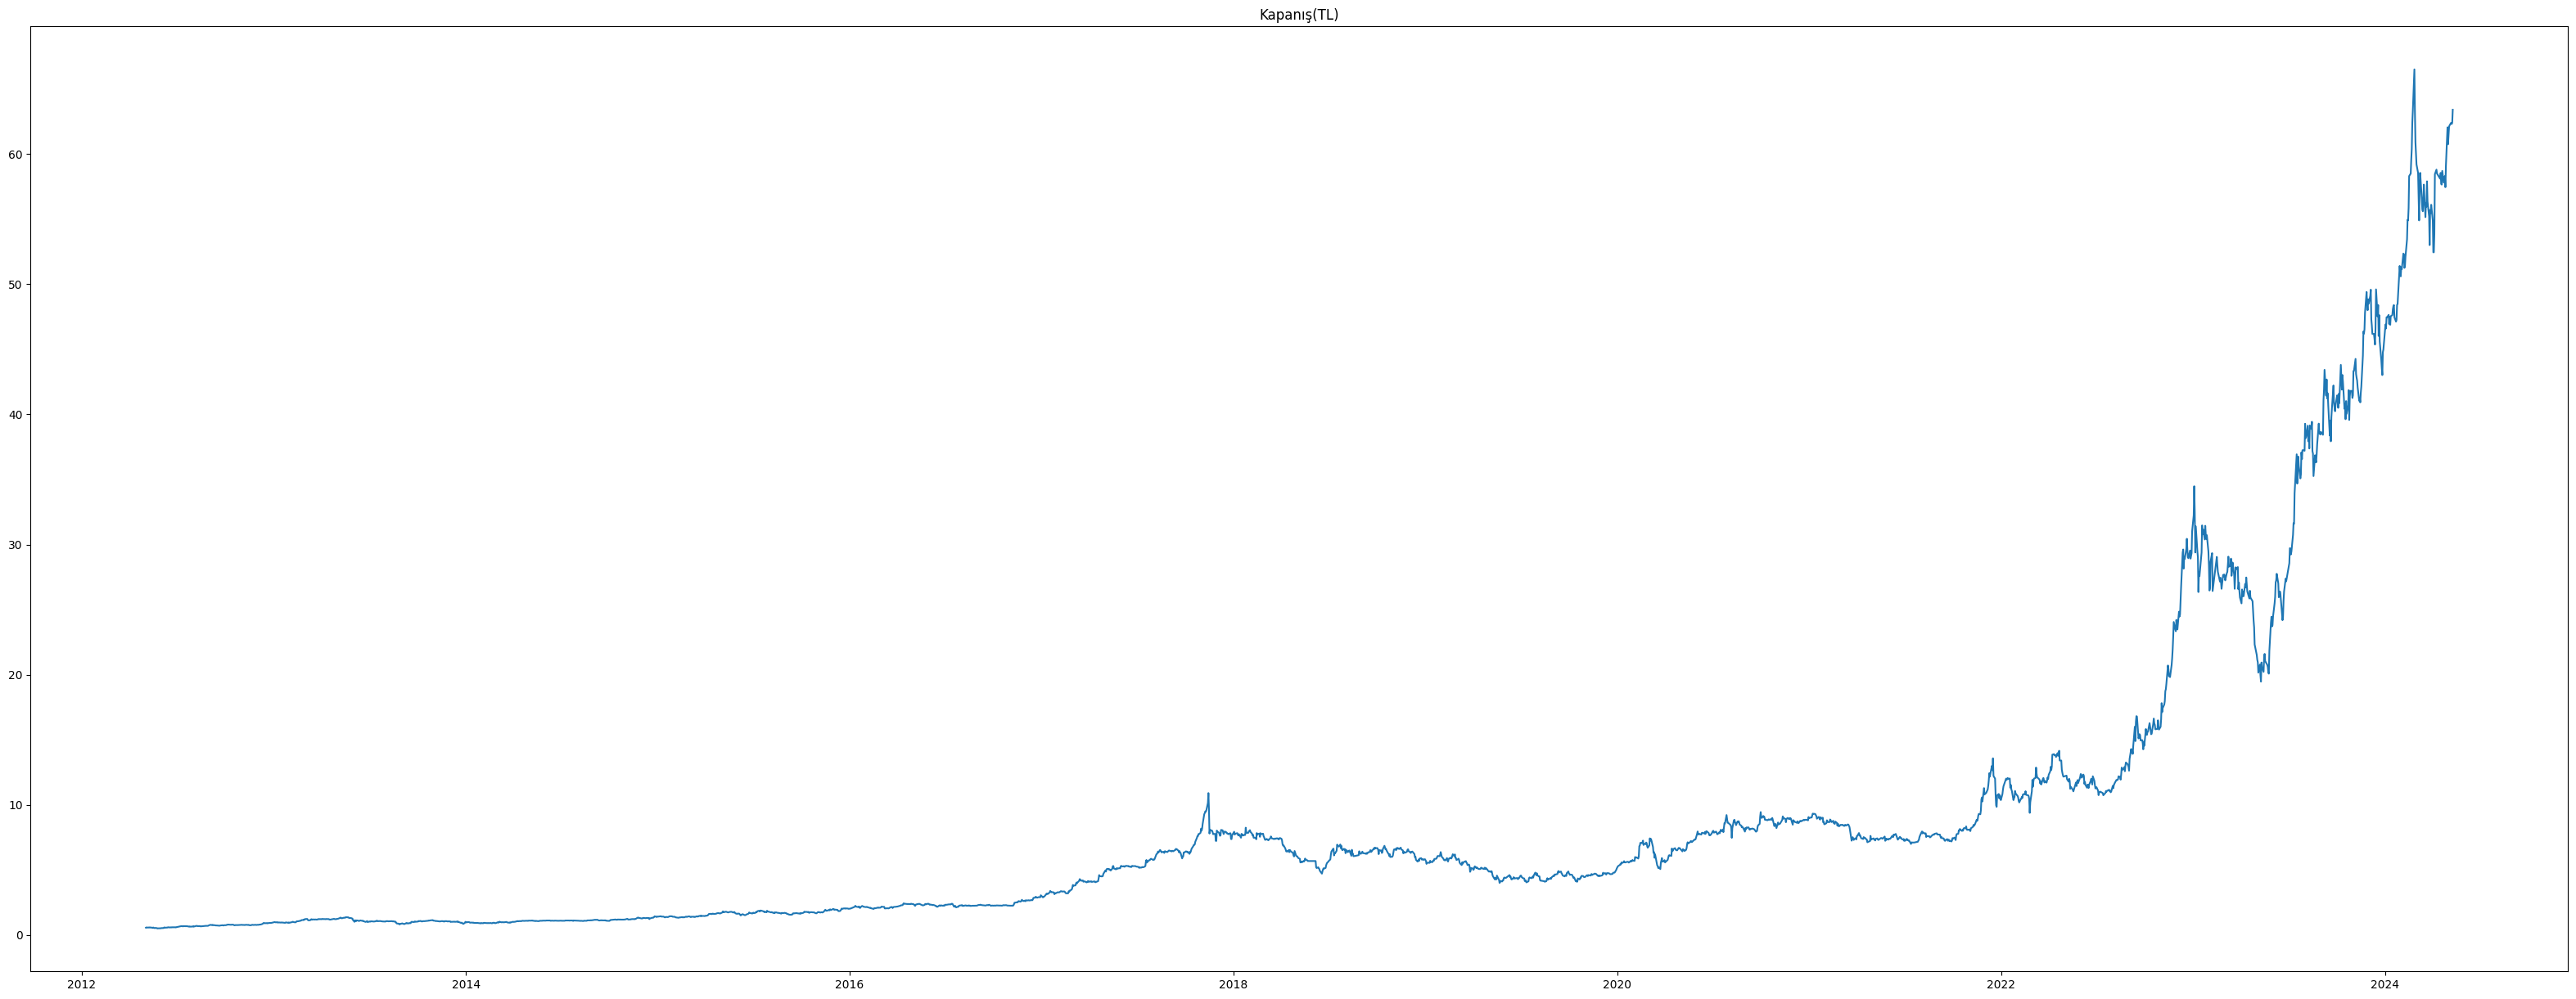

In [77]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(df_new_drop.index,df_new_drop["Kapanış(TL)"])
ax.set_title ('Kapanış(TL)')

In [78]:
df_final=df_new_drop.reset_index()
df_final.head()

,Tarih,Kapanış(TL)
0,2012-05-02,0.57
1,2012-05-03,0.59
2,2012-05-04,0.58
3,2012-05-07,0.58
4,2012-05-08,0.59


Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 1500x600 with 0 Axes>

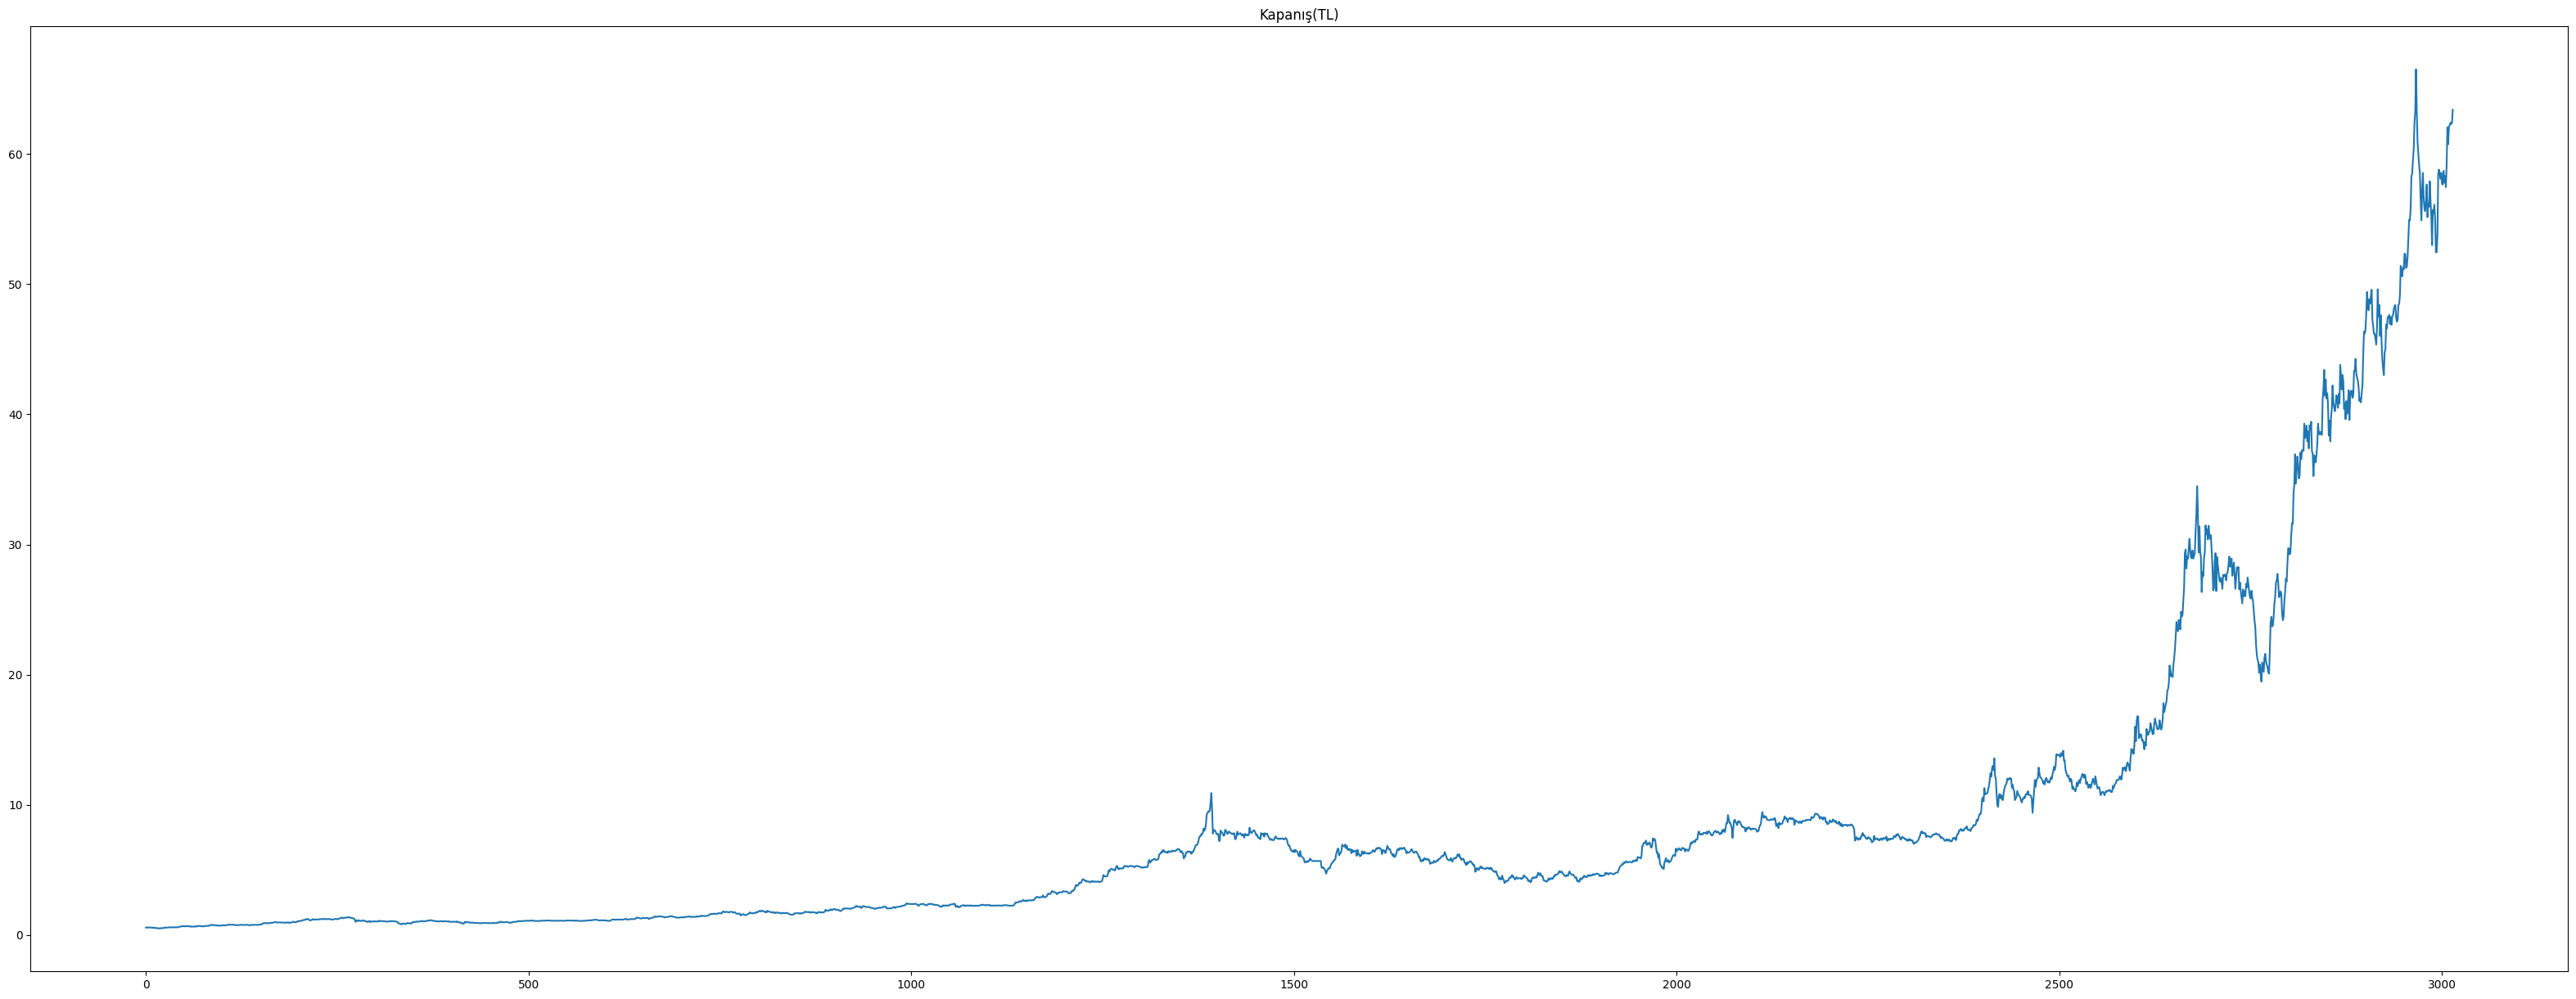

In [79]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(df_final.index,df_final["Kapanış(TL)"])
ax.set_title ('Kapanış(TL)')

In [80]:
dt_arr=np.array(df_final["Kapanış(TL)"])
dt_arr

array([ 0.57,  0.59,  0.58, ..., 62.3 , 62.4 , 63.4 ])

In [81]:
from keras.preprocessing.sequence import TimeseriesGenerator
train, test = dt_arr[0:round(0.90*len(dt_arr))], dt_arr[round(0.90*len(dt_arr)):]
window_size=42
batch_size=32
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=batch_size)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=batch_size)

# Eğitim veri setinden X_train ve y_train'i al
X_train = []
y_train = []
for i in range(len(train_generator)):
    X_batch, y_batch = train_generator[i]
    X_train.extend(X_batch)
    y_train.extend(y_batch)

# Test veri setinden X_test ve y_test'i al
X_test = []
y_test = []
for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    X_test.extend(X_batch)
    y_test.extend(y_batch)

# Sonuçları numpy dizilerine dönüştür
X_train_LSTM = np.array(X_train)
y_train_LSTM = np.array(y_train)
X_test_LSTM = np.array(X_test)
y_test_LSTM = np.array(y_test)

X_train,y_train=X_train_LSTM.reshape(X_train_LSTM.shape[0], -1),y_train_LSTM.reshape(y_train_LSTM.shape[0], -1)
X_test,y_test=X_test_LSTM.reshape(X_test_LSTM.shape[0], -1),y_test_LSTM.reshape(y_test_LSTM.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

(2672, 42)
(259, 42)


In [82]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras import layers
from keras import backend as K
import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow import keras


from sklearn.model_selection import GridSearchCV,train_test_split,TimeSeriesSplit

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import seaborn as sn
import pathlib
from IPython.display import clear_output


from sklearn.svm import SVR
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [83]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
    
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

class PlotLearning(Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)
        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()



In [84]:
results=pd.DataFrame(columns = ['Model', 'Dataset', 'MAE','MSE','RMSE','R2','Window','Batch_size','Patience'])

In [85]:
from sklearn.linear_model import Ridge

In [86]:
model_params = {
        'params': {
            'alpha': np.logspace(-30, 0, 30),
            'max_iter':  [100,1000,10000,100000]
        }
    }

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, model_params["params"], scoring='neg_mean_squared_error',cv=5,verbose=True)
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'alpha': 1.0, 'max_iter': 100}


In [87]:
ridge = Ridge(alpha=1,max_iter=100)  
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=100)

In [88]:
train_predict=ridge.predict(X_train)
test_predict=ridge.predict(X_test)

mae,mse,rmse,r2_test=evaluate(test_predict,y_test)
results = pd.concat([results,
                     pd.DataFrame([{
                         'Model':'Ridge',
                         'Dataset':'Test',
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2_test,
                         'Window':window_size,
                         'Batch_size':batch_size,
                         'Patience':15
                     }])], ignore_index=True)

mae,mse,rmse,r2=evaluate(train_predict,y_train)
results = pd.concat([results,
                     pd.DataFrame([{
                         'Model':'Ridge',
                         'Dataset':'Train',
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2,
                         'Window':window_size,
                         'Batch_size':batch_size,
                         'Patience':15
                     }])], ignore_index=True)
results

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18708\1350618245.py:5: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Model,Dataset,MAE,MSE,RMSE,R2,Window,Batch_size,Patience
0,Ridge,Test,1.066224,1.780166,1.334229,0.986808,42,32,15
1,Ridge,Train,0.112703,0.056195,0.237055,0.997869,42,32,15


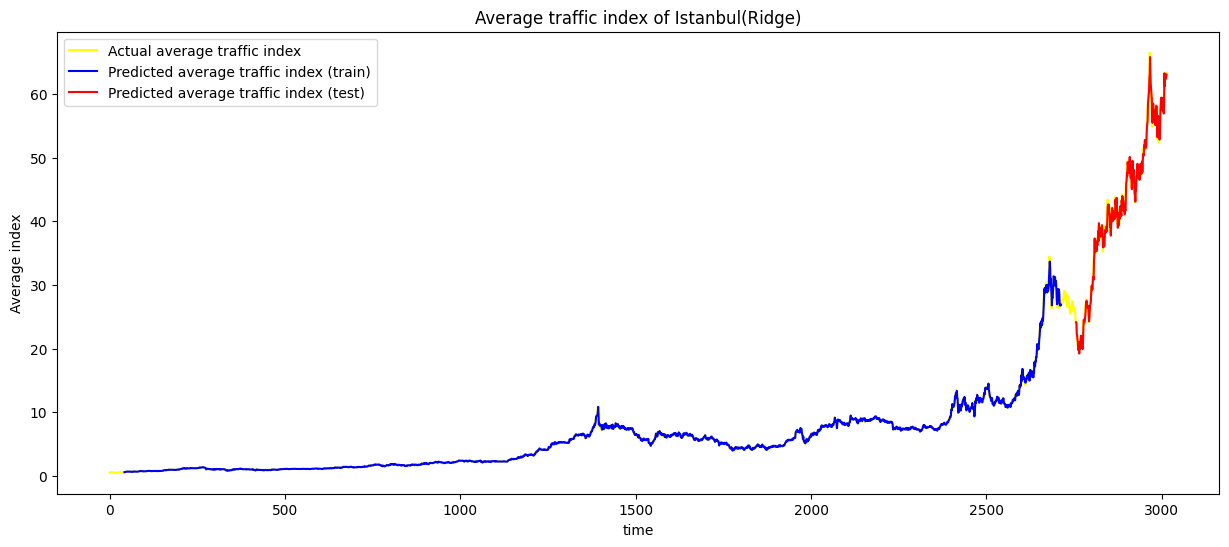

In [89]:
plt.figure(figsize=(15, 6))
plt.plot(df_final["Kapanış(TL)"], color='yellow', label="Actual average traffic index")

# Shifting the x-values for the second plot by 60 for training data
shifted_train_predict_values = np.arange(len(train_predict)) + window_size
plt.plot(shifted_train_predict_values, train_predict, color='blue', label="Predicted average traffic index (train)")

# Shifting the x-values for the third plot by 120 for test data
shifted_test_predict_values = np.arange(len(test_predict)) + len(train_predict) + 2*window_size
test_predict_inverse_flattened = test_predict.flatten()  # Flatten test_predict_inverse
plt.plot(shifted_test_predict_values, test_predict, color='red', label="Predicted average traffic index (test)")

plt.title("Average traffic index of Istanbul(Ridge)")
plt.xlabel("time")
plt.ylabel("Average index")
plt.legend()
plt.show()

In [90]:
import plotly.offline as py
import plotly.graph_objs as go

In [91]:
actual_trace = go.Scatter(
    x=df_new_drop.tail(len(test_predict)).index,
    y=y_test.flatten(),
    mode='lines',
    name="Gerçek ASELS Tarihsel Fiyat Bilgileri",
    line=dict(color='red')
)

test_actual_trace = go.Scatter(
    x=df_new_drop.tail(len(test_predict)).index,
    y=test_predict.flatten(),
    mode='lines',
    name="Tahmin edilen ASELS Tarihsel Fiyat Bilgileri",
    line=dict(color='blue')
)

data = [actual_trace, test_actual_trace]

layout = go.Layout(
    title="ASELS Tarihsel Fiyat Bilgileri",
    xaxis=dict(title="Tarih"),
    yaxis=dict(title="Fiyat Bilgileri"),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
print("Doğruluk:",r2_test*100)

Doğruluk: 98.68079040960525


In [92]:
test_Akcay=ridge.predict(X_test[-1].reshape(1,-1))

In [93]:
test_Akcay[0][0]

63.07798763881989

In [94]:
X_test[-1]

array([56.6 , 54.9 , 57.25, 58.55, 56.6 , 55.8 , 55.6 , 56.4 , 57.65,
       55.15, 56.2 , 55.95, 57.9 , 56.35, 55.2 , 53.  , 55.7 , 55.45,
       56.1 , 54.9 , 52.45, 52.45, 53.85, 58.45, 58.8 , 58.5 , 58.1 ,
       58.55, 57.7 , 57.65, 58.7 , 57.8 , 58.3 , 57.45, 59.1 , 62.05,
       60.75, 62.1 , 62.2 , 62.4 , 62.3 , 62.4 ])

In [105]:
X_test[-1].shape

(42,)

In [95]:
projection=40

data_projection=X_test[-1]
data_projection = np.roll(data_projection, -1)
data_projection[-1] = y_test[-1]
data_projection_control=data_projection
print(data_projection_control)

[54.9  57.25 58.55 56.6  55.8  55.6  56.4  57.65 55.15 56.2  55.95 57.9
 56.35 55.2  53.   55.7  55.45 56.1  54.9  52.45 52.45 53.85 58.45 58.8
 58.5  58.1  58.55 57.7  57.65 58.7  57.8  58.3  57.45 59.1  62.05 60.75
 62.1  62.2  62.4  62.3  62.4  63.4 ]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18708\2552776792.py:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [96]:
for i in range(0,projection):
    test_Akcay=ridge.predict(data_projection.reshape(1,-1))
    data_projection = np.roll(data_projection, -1)
    data_projection[-1] = test_Akcay[0]
data_projection[-projection:]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18708\17678897.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18708\17678897.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18708\17678897.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18708\17678897.py:4: DeprecationWarning:

Conversion of an a

array([62.6799448 , 62.18230277, 62.12255928, 63.24047636, 63.05912774,
       62.85211545, 63.31722365, 65.3337616 , 65.91997282, 65.7981736 ,
       65.57964545, 65.46468586, 65.84254825, 65.4617576 , 65.25545921,
       65.73793109, 65.33905561, 65.54573743, 66.83692194, 67.51580627,
       67.62984872, 66.89238964, 67.52782811, 67.98414573, 67.57850035,
       67.44840614, 67.85693112, 67.86238063, 67.80161526, 67.35625191,
       67.939684  , 68.72783542, 68.33854254, 68.68348281, 69.17917093,
       69.53319504, 69.43689431, 69.38727369, 69.64497159, 69.51933743])

In [97]:
arr_scaled=np.array(data_projection_control).reshape(-1,1)

In [98]:
data_projection_scaled=np.array(data_projection[-projection:]).reshape(-1,1)

In [99]:
final_arr = np.concatenate((np.squeeze(data_projection_control), np.squeeze(data_projection_scaled)))

In [100]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Get the start date from the DataFrame
start_date = df_final.iloc[-1]["Tarih"]
# Calculate the end date by adding projection and window_size
end_date = start_date + DateOffset(days=(projection+2*(projection//5)))

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Filter out weekends and ensure the length is len(final_arr)
weekdays = date_range[date_range.dayofweek < 5][:len(final_arr)]

# Remove the start date from the weekdays if it's present
if len(weekdays) > 0 and weekdays[0] == start_date:
    weekdays = weekdays[1:]

# Create a DataFrame with the date data
df_dates = pd.DataFrame({'Tarih': weekdays})

In [101]:
df_final_subset = df_final.iloc[-(window_size):]["Tarih"]
df_final_subset = df_final_subset.to_frame()

# Concatenate df_final_subset and df_dates along rows
df_res = pd.concat([df_final_subset, df_dates], ignore_index=True)

In [102]:
df_res.insert(1, "Values", final_arr, True)

In [103]:
import plotly.graph_objs as go

actual_trace = go.Scatter(
    x=df_res["Tarih"].iloc[:window_size],
    y=df_res["Values"].iloc[:window_size],
    mode='markers',
    name="Geçmiş ASELS Verileri",
    line=dict(color='blue')
)

test_actual_trace = go.Scatter(
    x=df_res["Tarih"].iloc[window_size:],
    y=df_res["Values"].iloc[window_size:],
    mode='markers',
    name=f"{projection} Günlük ASELS Tahmin",
    line=dict(color='red')
)

total_trace = go.Scatter(
    x=df_res["Tarih"],
    y=df_res["Values"],
    mode='lines',
    name="ASELS Fiyat Tahmin+Gerçek",
    line=dict(color='yellow')
)

data = [actual_trace, test_actual_trace, total_trace]

layout = go.Layout(
    title=f"{projection} Günlük ASELS Tarihsel Fiyat Tahminleri",
    xaxis=dict(title="Time"),
    yaxis=dict(title="ASELS Tarihsel Fiyat Bilgileri"),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [104]:
print("ASELS")
df_res.iloc[window_size:]

ASELS


,Tarih,Values
42,2024-05-10,62.679945
43,2024-05-13,62.182303
44,2024-05-14,62.122559
45,2024-05-15,63.240476
46,2024-05-16,63.059128
47,2024-05-17,62.852115
48,2024-05-20,63.317224
49,2024-05-21,65.333762
50,2024-05-22,65.919973
51,2024-05-23,65.798174


In [59]:
from joblib import dump, load
dump(ridge, 'models/ridge_model_asels_10May2024.joblib')

['models/ridge_model_asels_10May2024.joblib']